# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import io
import requests
url="https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv"
read_data=requests.get(url).content
read_data

b'months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39\r\n328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,\r\n228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relat

# Read the data

In [2]:
df=pd.read_csv(io.StringIO(read_data.decode('utf-8')))
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Finding the no of rows and columns

In [3]:
df.shape

(1000, 40)

# Describing the data

In [4]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


# Finding the types of columns

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.describe(include= "all")

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,14,39,NaN,2,NaN
top,NaN,NaN,NaN,01-01-2006,OH,250/500,NaN,NaN,NaN,NaN,...,NO,NaN,NaN,NaN,NaN,Dodge,RAM,NaN,N,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,343,NaN,NaN,NaN,NaN,80,43,NaN,753,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN,NaN


# Finding the information out of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

# Finding out the datatypes

In [8]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# Finding out if there are any null values

In [9]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Plotting histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A819D809B0>,
      dtype=object)

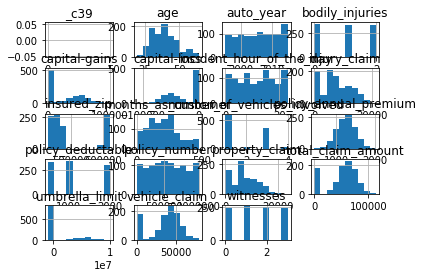

In [10]:
df.hist()

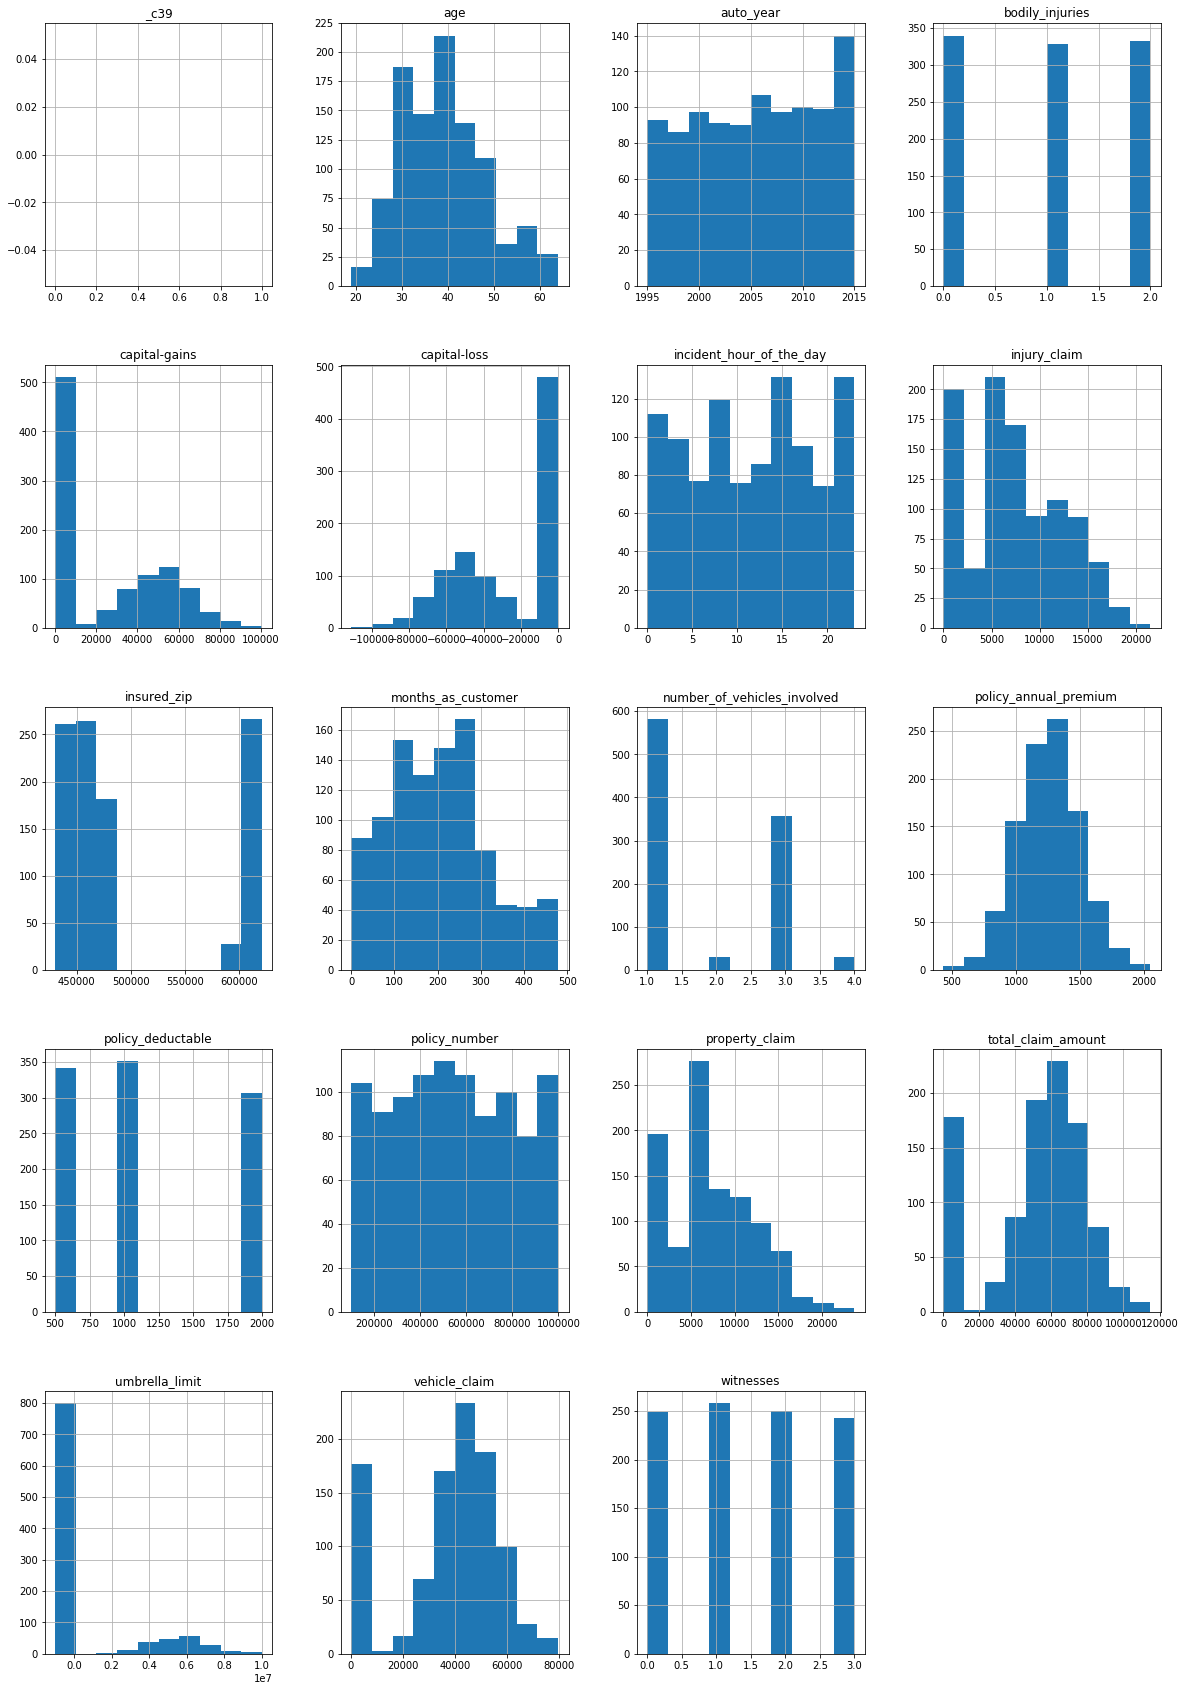

In [11]:
df.hist(figsize=(20,30))
plt.show()

# Identifying unique values

In [12]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

# Finding out the count

In [13]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

# EDA

# Univariate Analysis

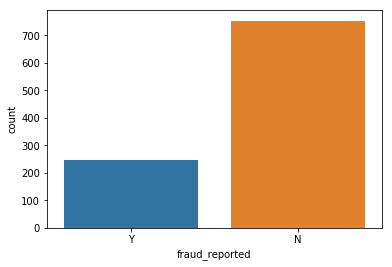

In [14]:
sn.countplot(df['fraud_reported']);

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


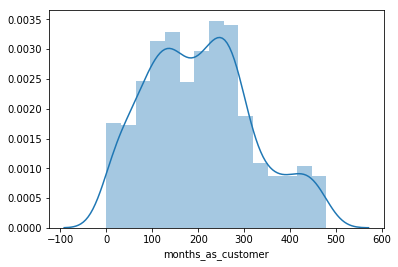

In [15]:
sn.distplot(df["months_as_customer"])

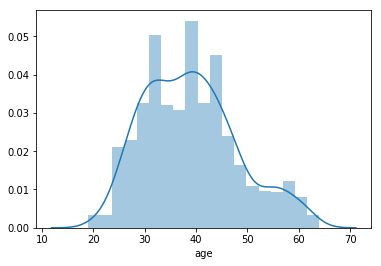

In [16]:
sn.distplot(df["age"])

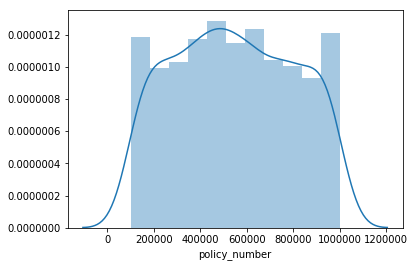

In [17]:
sn.distplot(df["policy_number"])

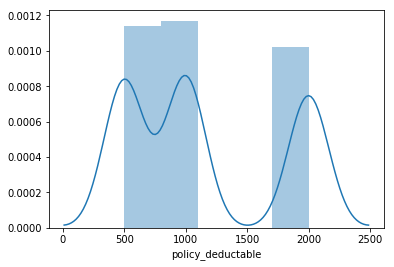

In [18]:
sn.distplot(df["policy_deductable"])

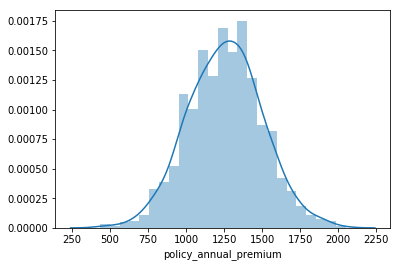

In [19]:
sn.distplot(df["policy_annual_premium"])

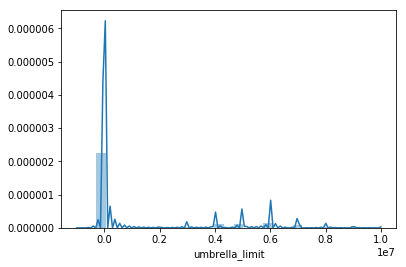

In [20]:
sn.distplot(df["umbrella_limit"])

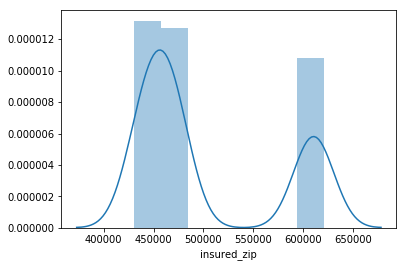

In [21]:
sn.distplot(df["insured_zip"])

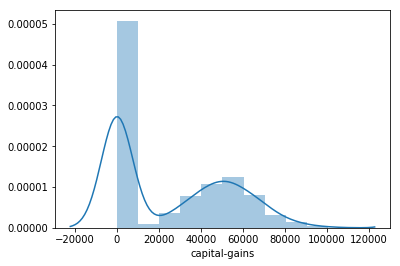

In [22]:
sn.distplot(df["capital-gains"])

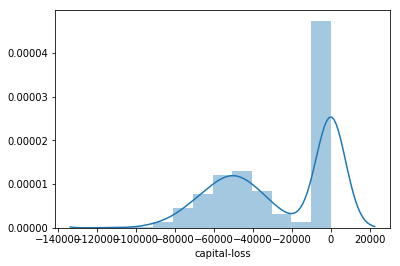

In [23]:
sn.distplot(df["capital-loss"])

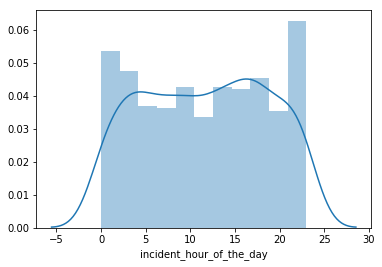

In [24]:
sn.distplot(df["incident_hour_of_the_day"])

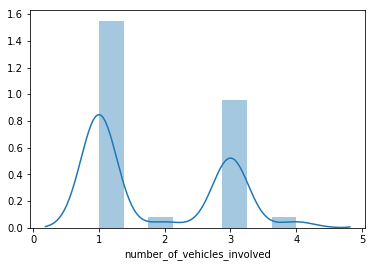

In [25]:
sn.distplot(df["number_of_vehicles_involved"])

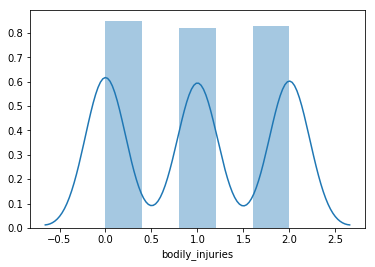

In [26]:
sn.distplot(df["bodily_injuries"])

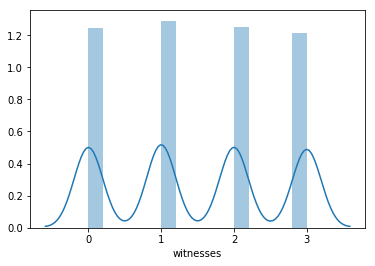

In [27]:
sn.distplot(df["witnesses"])

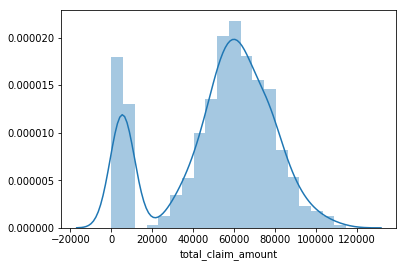

In [28]:
sn.distplot(df["total_claim_amount"])

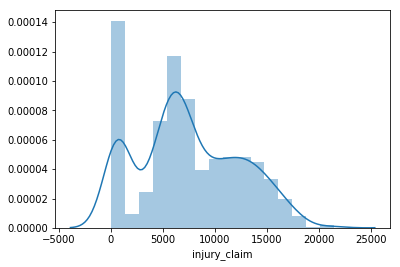

In [29]:
sn.distplot(df["injury_claim"])

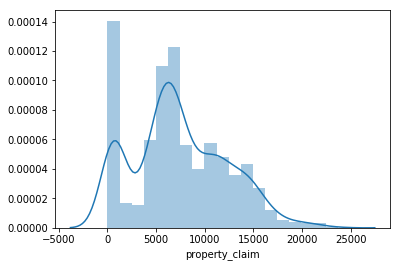

In [30]:
sn.distplot(df["property_claim"])

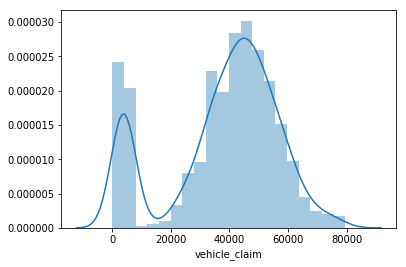

In [31]:
sn.distplot(df["vehicle_claim"])

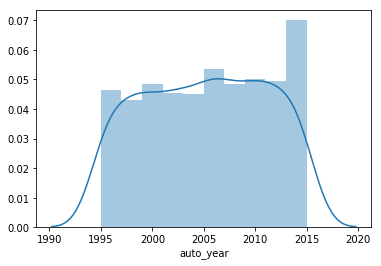

In [32]:
sn.distplot(df["auto_year"])

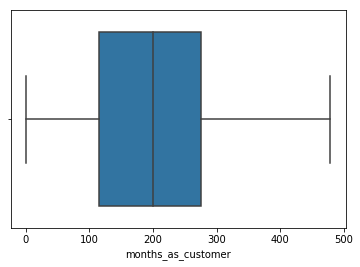

In [33]:
sn.boxplot(df["months_as_customer"])

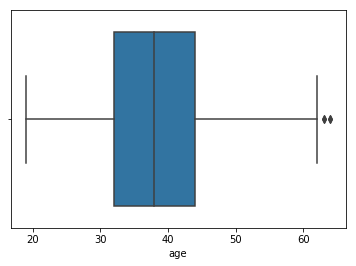

In [34]:
sn.boxplot(df["age"])

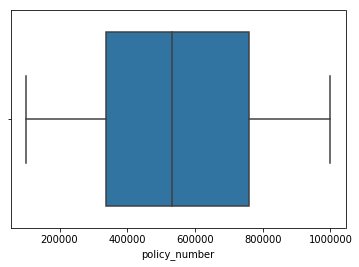

In [35]:
sn.boxplot(df["policy_number"])

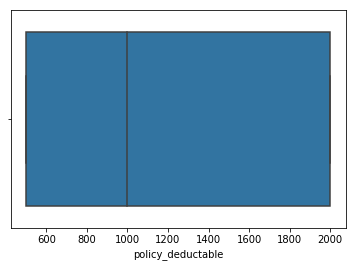

In [36]:
sn.boxplot(df["policy_deductable"])

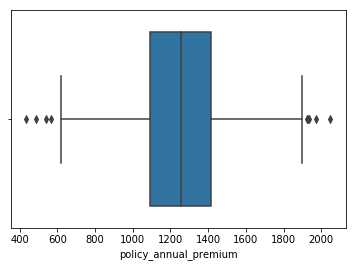

In [37]:
sn.boxplot(df["policy_annual_premium"])

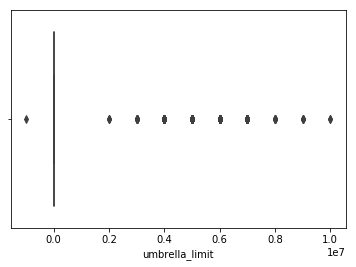

In [38]:
sn.boxplot(df["umbrella_limit"])

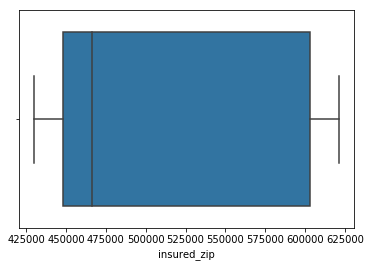

In [39]:
sn.boxplot(df["insured_zip"])

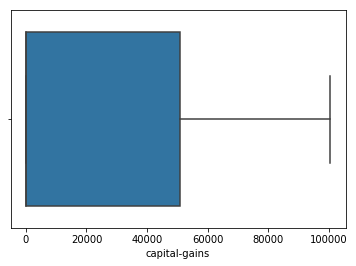

In [40]:
sn.boxplot(df["capital-gains"])

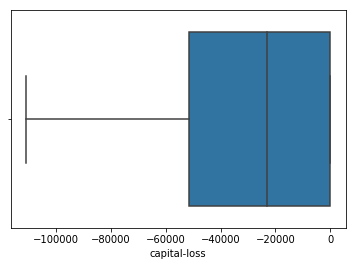

In [41]:
sn.boxplot(df["capital-loss"])

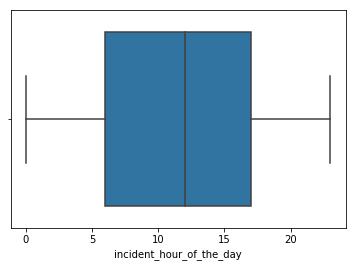

In [42]:
sn.boxplot(df["incident_hour_of_the_day"])

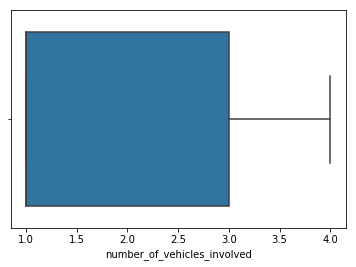

In [43]:
sn.boxplot(df["number_of_vehicles_involved"])

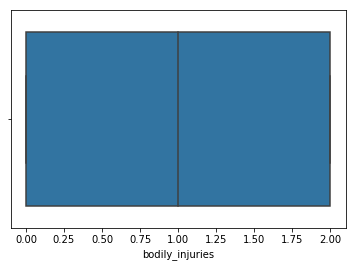

In [44]:
sn.boxplot(df["bodily_injuries"])

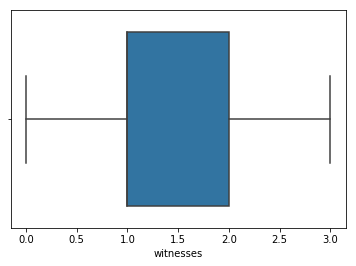

In [45]:
sn.boxplot(df["witnesses"])

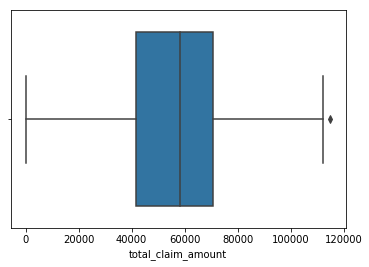

In [46]:
sn.boxplot(df["total_claim_amount"])

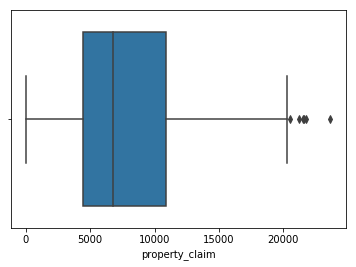

In [47]:
sn.boxplot(df["property_claim"])

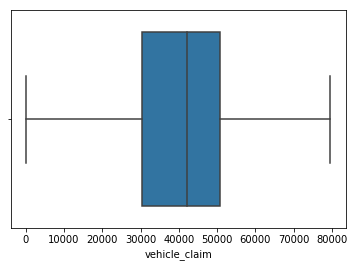

In [48]:
sn.boxplot(df["vehicle_claim"])

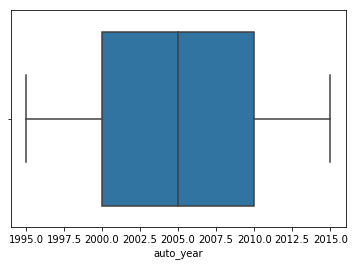

In [49]:
sn.boxplot(df["auto_year"])

In [50]:
import matplotlib.pyplot as plt
import seaborn as sn

# Bivariate Analysis

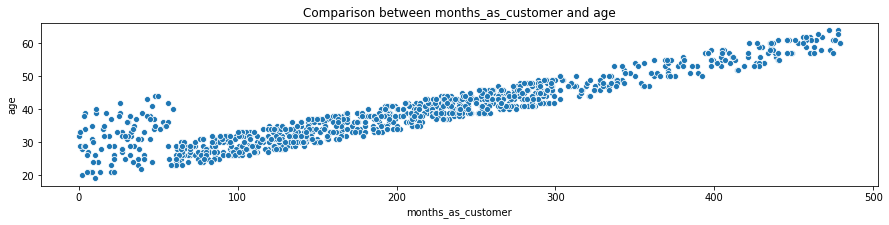

In [51]:
plt.figure(figsize=[15,3])
plt.title('Comparison between months_as_customer and age')
sn.scatterplot(df['months_as_customer'], df['age']);

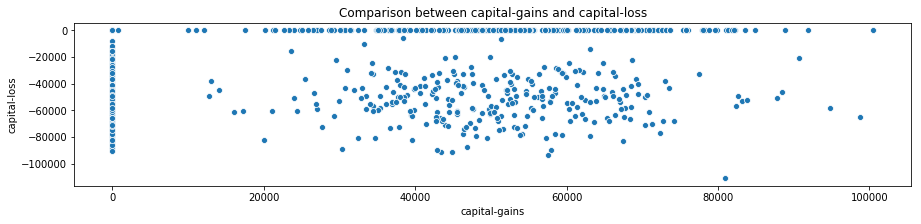

In [52]:
plt.figure(figsize=[15,3])
plt.title('Comparison between capital-gains and capital-loss')
sn.scatterplot(df['capital-gains'], df['capital-loss']);

# Multivariate Analysis

In [53]:
cor=df.corr()

In [54]:
cor

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


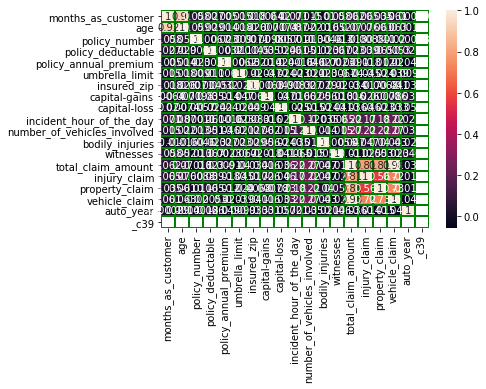

In [55]:
sn.heatmap(cor,annot=True,linewidths=1,linecolor ='green')

# Encoding

In [56]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [57]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [58]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0,NaN
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0.0,5070,780,780,3510,8.0,12.0,2007,1.0,NaN
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0,NaN
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0,NaN
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0,NaN
5,256,39,104594,385.0,2.0,1.0,1000,1351.10,0,478456,...,1.0,64100,6410,6410,51280,10.0,3.0,2003,1.0,NaN
6,137,34,413978,112.0,1.0,1.0,1000,1333.35,0,441716,...,0.0,78650,21450,7150,50050,9.0,29.0,2012,0.0,NaN
7,165,37,429027,60.0,0.0,0.0,1000,1137.03,0,603195,...,2.0,51590,9380,9380,32830,1.0,5.0,2015,0.0,NaN
8,27,33,485665,132.0,0.0,0.0,500,1442.99,0,601734,...,2.0,27700,2770,2770,22160,12.0,9.0,2012,0.0,NaN
9,212,42,636550,772.0,0.0,0.0,500,1315.68,0,600983,...,0.0,42300,4700,4700,32900,10.0,1.0,1996,0.0,NaN


# Removing Outliers using Zscore

In [59]:
from scipy.stats import zscore

z=np.abs(zscore(df))

new_df=df[(z<3)]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


# Finding out New Shape

In [60]:
new_df.shape

(38980, 40)

# Finding out Skewness

In [61]:
new_df.skew()

months_as_customer             0.361660
age                            0.478198
policy_number                  0.038865
policy_bind_date               0.005216
policy_state                  -0.026439
policy_csl                     0.089032
policy_deductable              0.477143
policy_annual_premium          0.005158
umbrella_limit                 1.804704
insured_zip                    0.815877
insured_sex                    0.148179
insured_education_level        0.000014
insured_occupation            -0.058707
insured_hobbies               -0.061470
insured_relationship           0.077396
capital-gains                  0.477842
capital-loss                  -0.390542
incident_date                  0.004696
incident_type                  0.101084
collision_type                -0.193079
incident_severity              0.278576
authorities_contacted         -0.121373
incident_state                -0.148657
incident_city                  0.049314
incident_location             -0.000085


In [62]:
x=new_df.drop("fraud_reported",axis=1)
y=new_df["fraud_reported"]

# Importing train_test_split

In [63]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [64]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Replancing the column with 0

In [65]:
df._c39 = df._c39.fillna('0')

In [66]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0,0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0.0,5070,780,780,3510,8.0,12.0,2007,1.0,0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0,0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0,0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0,0
5,256,39,104594,385.0,2.0,1.0,1000,1351.10,0,478456,...,1.0,64100,6410,6410,51280,10.0,3.0,2003,1.0,0
6,137,34,413978,112.0,1.0,1.0,1000,1333.35,0,441716,...,0.0,78650,21450,7150,50050,9.0,29.0,2012,0.0,0
7,165,37,429027,60.0,0.0,0.0,1000,1137.03,0,603195,...,2.0,51590,9380,9380,32830,1.0,5.0,2015,0.0,0
8,27,33,485665,132.0,0.0,0.0,500,1442.99,0,601734,...,2.0,27700,2770,2770,22160,12.0,9.0,2012,0.0,0
9,212,42,636550,772.0,0.0,0.0,500,1315.68,0,600983,...,0.0,42300,4700,4700,32900,10.0,1.0,1996,0.0,0


# Encoding

In [67]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [68]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [69]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0,0.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0.0,5070,780,780,3510,8.0,12.0,2007,1.0,0.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0,0.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0,0.0
5,256,39,104594,385.0,2.0,1.0,1000,1351.10,0,478456,...,1.0,64100,6410,6410,51280,10.0,3.0,2003,1.0,0.0
6,137,34,413978,112.0,1.0,1.0,1000,1333.35,0,441716,...,0.0,78650,21450,7150,50050,9.0,29.0,2012,0.0,0.0
7,165,37,429027,60.0,0.0,0.0,1000,1137.03,0,603195,...,2.0,51590,9380,9380,32830,1.0,5.0,2015,0.0,0.0
8,27,33,485665,132.0,0.0,0.0,500,1442.99,0,601734,...,2.0,27700,2770,2770,22160,12.0,9.0,2012,0.0,0.0
9,212,42,636550,772.0,0.0,0.0,500,1315.68,0,600983,...,0.0,42300,4700,4700,32900,10.0,1.0,1996,0.0,0.0


# Handling Null Values

In [70]:
df.apply(lambda x: sum(x.isnull()),axis=0)

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [71]:
df.collision_type = df.collision_type.fillna('Side Collision')

In [72]:
df['collision_type'].value_counts()

2.0    292
3.0    276
1.0    254
0.0    178
Name: collision_type, dtype: int64

In [73]:
df.property_damage = df.property_damage.fillna('YES')

In [74]:
df['property_damage'].value_counts()

0.0    360
1.0    338
2.0    302
Name: property_damage, dtype: int64

In [75]:
df.police_report_available = df.police_report_available.fillna('YES')

In [76]:
df['police_report_available'].value_counts()

1.0    343
0.0    343
2.0    314
Name: police_report_available, dtype: int64

In [77]:
df.apply(lambda x: sum(x.isnull()),axis=0)

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [78]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [80]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [81]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0,0.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0.0,5070,780,780,3510,8.0,12.0,2007,1.0,0.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0,0.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0,0.0
5,256,39,104594,385.0,2.0,1.0,1000,1351.10,0,478456,...,1.0,64100,6410,6410,51280,10.0,3.0,2003,1.0,0.0
6,137,34,413978,112.0,1.0,1.0,1000,1333.35,0,441716,...,0.0,78650,21450,7150,50050,9.0,29.0,2012,0.0,0.0
7,165,37,429027,60.0,0.0,0.0,1000,1137.03,0,603195,...,2.0,51590,9380,9380,32830,1.0,5.0,2015,0.0,0.0
8,27,33,485665,132.0,0.0,0.0,500,1442.99,0,601734,...,2.0,27700,2770,2770,22160,12.0,9.0,2012,0.0,0.0
9,212,42,636550,772.0,0.0,0.0,500,1315.68,0,600983,...,0.0,42300,4700,4700,32900,10.0,1.0,1996,0.0,0.0


In [85]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0,0.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0.0,5070,780,780,3510,8.0,12.0,2007,1.0,0.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0,0.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0,0.0


In [86]:
df[['insured_zip']] = df[['insured_zip']].astype(object)

# Describing the Data

In [88]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,0.463000,...,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,0.0
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,0.498879,...,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,0.0
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,...,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,0.0
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,0.000000,...,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,0.0
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,0.000000,...,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,0.0
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,1.000000,...,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,0.0
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,1.000000,...,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,0.0


# Finding Out the count

In [89]:
df.auto_year.value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [90]:
df['vehicle_age'] = 2018 - df['auto_year']

In [91]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,vehicle_age
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,71610,6510,13020,52080,10.0,1.0,2004,1.0,0.0,14
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,5070,780,780,3510,8.0,12.0,2007,1.0,0.0,11
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,4.0,30.0,2007,0.0,0.0,11
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,3.0,34.0,2014,1.0,0.0,4
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,6500,1300,650,4550,0.0,31.0,2009,0.0,0.0,9
5,256,39,104594,385.0,2.0,1.0,1000,1351.10,0,478456,...,64100,6410,6410,51280,10.0,3.0,2003,1.0,0.0,15
6,137,34,413978,112.0,1.0,1.0,1000,1333.35,0,441716,...,78650,21450,7150,50050,9.0,29.0,2012,0.0,0.0,6
7,165,37,429027,60.0,0.0,0.0,1000,1137.03,0,603195,...,51590,9380,9380,32830,1.0,5.0,2015,0.0,0.0,3
8,27,33,485665,132.0,0.0,0.0,500,1442.99,0,601734,...,27700,2770,2770,22160,12.0,9.0,2012,0.0,0.0,6
9,212,42,636550,772.0,0.0,0.0,500,1315.68,0,600983,...,42300,4700,4700,32900,10.0,1.0,1996,0.0,0.0,22


In [92]:
df.select_dtypes(include=['object']).columns

Index(['insured_zip'], dtype='object')

# Dropping Columns which are not important

In [94]:
df = df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39', 
    'auto_year', 
    'incident_hour_of_the_day'])

In [95]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
0,328,48,2.0,1.0,1000,1406.91,0,1.0,4.0,2.0,...,2,2.0,71610,6510,13020,52080,10.0,1.0,1.0,14
1,228,42,1.0,1.0,2000,1197.22,5000000,1.0,4.0,6.0,...,0,0.0,5070,780,780,3510,8.0,12.0,1.0,11
2,134,29,2.0,0.0,2000,1413.14,5000000,0.0,6.0,11.0,...,3,1.0,34650,7700,3850,23100,4.0,30.0,0.0,11
3,256,41,0.0,1.0,2000,1415.74,6000000,0.0,6.0,1.0,...,2,1.0,63400,6340,6340,50720,3.0,34.0,1.0,4
4,228,44,0.0,2.0,1000,1583.91,6000000,1.0,0.0,11.0,...,1,1.0,6500,1300,650,4550,0.0,31.0,0.0,9


In [96]:
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

Empty DataFrame
Columns: []
Index: []


In [97]:
df.collision_type.value_counts()

2.0    292
3.0    276
1.0    254
0.0    178
Name: collision_type, dtype: int64

In [98]:
df.property_damage.value_counts()

0.0    360
1.0    338
2.0    302
Name: property_damage, dtype: int64

In [99]:
df.police_report_available.value_counts()

1.0    343
0.0    343
2.0    314
Name: police_report_available, dtype: int64

In [100]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age'],
      dtype='object')

# Finding numeric columns

In [101]:
df._get_numeric_data().head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
0,328,48,2.0,1.0,1000,1406.91,0,1.0,4.0,2.0,...,2,2.0,71610,6510,13020,52080,10.0,1.0,1.0,14
1,228,42,1.0,1.0,2000,1197.22,5000000,1.0,4.0,6.0,...,0,0.0,5070,780,780,3510,8.0,12.0,1.0,11
2,134,29,2.0,0.0,2000,1413.14,5000000,0.0,6.0,11.0,...,3,1.0,34650,7700,3850,23100,4.0,30.0,0.0,11
3,256,41,0.0,1.0,2000,1415.74,6000000,0.0,6.0,1.0,...,2,1.0,63400,6340,6340,50720,3.0,34.0,1.0,4
4,228,44,0.0,2.0,1000,1583.91,6000000,1.0,0.0,11.0,...,1,1.0,6500,1300,650,4550,0.0,31.0,0.0,9


In [102]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age'],
      dtype='object')

# Finding categorcial columns

In [103]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [112]:
import pandas as pd

# Using dummies for manipulation of data

In [116]:
dummies = pd.get_dummies(df[[
    'policy_state', 
    'policy_csl', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model']])

dummies = dummies.join(df[[
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

dummies.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,auto_model,collision_type,property_damage,police_report_available,fraud_reported
0,2.0,1.0,1.0,4.0,2.0,17.0,0.0,2.0,0.0,4.0,4.0,1.0,10.0,1.0,3.0,2.0,2.0,1.0
1,1.0,1.0,1.0,4.0,6.0,15.0,2.0,3.0,1.0,4.0,5.0,5.0,8.0,12.0,0.0,0.0,0.0,1.0
2,2.0,0.0,0.0,6.0,11.0,2.0,3.0,0.0,1.0,4.0,1.0,1.0,4.0,30.0,2.0,1.0,1.0,0.0
3,0.0,1.0,0.0,6.0,1.0,2.0,4.0,2.0,0.0,4.0,2.0,0.0,3.0,34.0,1.0,0.0,1.0,1.0
4,0.0,2.0,1.0,0.0,11.0,2.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,31.0,0.0,1.0,1.0,0.0


In [118]:
X = dummies.iloc[:, 0:-1]
y = dummies.iloc[:, -1]

# Label Encoding

In [119]:
from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X[['collision_type', 'collision_en']]

,collision_type,collision_en
0,3.0,3
1,0.0,0
2,2.0,2
3,1.0,1
4,0.0,0
5,2.0,2
6,1.0,1
7,1.0,1
8,1.0,1
9,2.0,2


In [129]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)

X.head(10)

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,auto_model,collision_type,property_damage,police_report_available,collision_en
0,2.0,1.0,1.0,4.0,2.0,17.0,0.0,2.0,0.0,4.0,4.0,1.0,10.0,1.0,3.0,2.0,2.0,3
1,1.0,1.0,1.0,4.0,6.0,15.0,2.0,3.0,1.0,4.0,5.0,5.0,8.0,12.0,0.0,0.0,0.0,0
2,2.0,0.0,0.0,6.0,11.0,2.0,3.0,0.0,1.0,4.0,1.0,1.0,4.0,30.0,2.0,1.0,1.0,2
3,0.0,1.0,0.0,6.0,1.0,2.0,4.0,2.0,0.0,4.0,2.0,0.0,3.0,34.0,1.0,0.0,1.0,1
4,0.0,2.0,1.0,0.0,11.0,2.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,31.0,0.0,1.0,1.0,0
5,2.0,1.0,0.0,6.0,12.0,3.0,4.0,0.0,0.0,1.0,4.0,0.0,10.0,3.0,2.0,1.0,1.0,2
6,1.0,1.0,1.0,6.0,9.0,2.0,0.0,0.0,1.0,4.0,1.0,6.0,9.0,29.0,1.0,0.0,0.0,1
7,0.0,0.0,1.0,0.0,12.0,0.0,4.0,0.0,2.0,4.0,5.0,1.0,1.0,5.0,1.0,0.0,2.0,1
8,0.0,0.0,0.0,6.0,7.0,9.0,3.0,2.0,2.0,4.0,6.0,0.0,12.0,9.0,1.0,1.0,2.0,1
9,0.0,0.0,1.0,6.0,8.0,4.0,5.0,2.0,2.0,3.0,0.0,2.0,10.0,1.0,2.0,1.0,0.0,2


In [132]:
X.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'auto_make', 'auto_model',
       'property_damage', 'police_report_available', 'collision_en',
       'months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
    

In [133]:
X = X.drop(columns = ['fraud_reported'])
X.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'auto_make', 'auto_model',
       'property_damage', 'police_report_available', 'collision_en',
       'months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
    

# Finding Length of Train and Test

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


# Problem Identification: Since we have to predict the Fraud Reported from the given dataset, this is a supervised algorithm. The target variable is Fraud Reported column. Since the values are categorical or Y/N, we are applying classification algorithm

# Fitting RFC

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn import metrics 
rfc = RandomForestClassifier(criterion = 'gini', n_estimators=1000, verbose=1, n_jobs = -1, class_weight = 'balanced', max_features = 'auto')
rfcg = rfc.fit(X_train,y_train) 
predictions = rfcg.predict(X_test)
print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s


Baseline: N_features:  49
Baseline: Accuracy:  75.0
Baseline: Recall:  29.51

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.95      0.84       139
         1.0       0.72      0.30      0.42        61

   micro avg       0.75      0.75      0.75       200
   macro avg       0.74      0.62      0.63       200
weighted avg       0.74      0.75      0.71       200



[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [164]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
logreg2= LogisticRegressionCV(solver='lbfgs', cv=5)
dtclf = DecisionTreeClassifier(max_depth=5)
rfclf = RandomForestClassifier()

In [165]:
seed = 3
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=5)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))

In [167]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    Results = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(Results)

LR: 0.777500 (0.038243)
DT: 0.763750 (0.045569)
RF: 0.775000 (0.039922)


Above results shows the accuracy on basis on algorithms applied